In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
df = pd.read_excel('Test.xlsx') # 宽带客户数据
df.head(); df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  367 non-null    float64
 1   NW                    367 non-null    float64
 2   center                367 non-null    float64
 3   SFPOI                 367 non-null    int64  
 4   BUSPOINT              367 non-null    int64  
 5   lapark_number         367 non-null    int64  
 6   BR                    367 non-null    float64
 7   VR                    367 non-null    float64
 8   IR                    367 non-null    float64
 9   RR                    367 non-null    float64
 10  CR                    367 non-null    float64
 11  OR                    367 non-null    float64
 12  intersection_density  367 non-null    float64
 13  link_node_radio       367 non-null    float64
 14  entropyall            367 non-null    float64
 15  FAR                   3

In [5]:
y = df['Ad_avg_work'] 
X = df.iloc[:, 0:-1] 

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.3, random_state=12345)

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, oob_score=True, random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True, random_state=0)

In [56]:
rf.score(x_test,y_test)

0.4565084186748165

In [57]:
rf.score(x_train,y_train)

0.9233123630186273

n=111
R^2=0.470451790905707
MSE=0.00691081827564001
RSS=0.7671008285960411


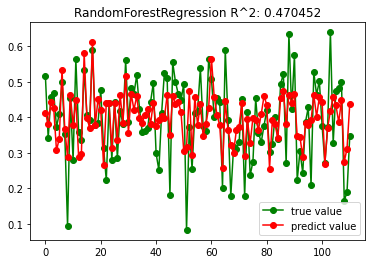

In [20]:
score = rf.score(x_test, y_test)
result = rf.predict(x_test)
ResidualSquare = (result - y_test)**2     #计算残差平方
RSS = sum(ResidualSquare)   #计算残差平方和
MSE = np.mean(ResidualSquare)       #计算均方差
num_regress = len(result)   #回归样本个数
print(f'n={num_regress}')
print(f'R^2={score}')
print(f'MSE={MSE}')
print(f'RSS={RSS}')

############绘制折线图##########
plt.figure()
plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
plt.title('RandomForestRegression R^2: %f'%score)
plt.legend()        # 将样例显示出来
plt.show()


线性回归模型平均性能得分：0.007532646563478733
随机森林回归模型平均性能得分：0.009080723428427797


In [39]:
score=[]

from tqdm import tqdm

for n in tqdm(range(1,100)):
    rfr = RandomForestRegressor(n_estimators=n)
    rfrscore = -cross_val_score(rfr,X,y,cv=10,scoring='neg_mean_squared_error').mean()
    score.append(rfrscore)

100%|██████████| 99/99 [02:27<00:00,  1.49s/it]


In [ ]:
#四、n_estimators的学习曲线2分多钟
rfc_l = []
for i in tqdm(range(0,100)):
    rfc = RandomForestRegressor(n_estimators=i+1)
    rfc_s = cross_val_score(rfc,X,y,cv=10).mean()
    rfc_l.append(rfc_s)

-42.23798702121607 97


/opt/anaconda3/envs/accessibility/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/accessibility/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/accessibility/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26862 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/accessibility/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/accessibility/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/envs/accessibilit

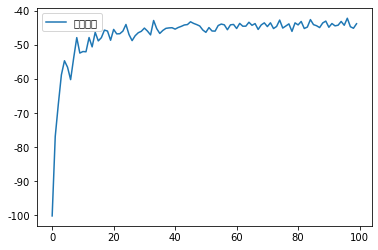

In [62]:
print(max(rfc_l),rfc_l.index(max(rfc_l))+1)   
plt.plot(range(0,100),rfc_l,label='随机森林')
plt.legend()
plt.show()

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=97, oob_score=True, random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=97, oob_score=True, random_state=0)

In [75]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

lm = linear_model.LinearRegression()
score = np.mean(-cross_val_score(lm,X,y,cv=10,scoring='neg_mean_squared_error'))
print('线性回归模型平均性能得分：'+str(score))

score = np.mean(-cross_val_score(rf,X,y,cv=10,scoring='neg_mean_squared_error'))
print('随机森林回归模型平均性能得分：'+str(score))

线性回归模型平均性能得分：0.007532646563478733
随机森林回归模型平均性能得分：0.009314498948970854


In [86]:
y_preditc=rf.predict(x_test) #reg是训练好的模型
mse_test=np.sum((y_preditc-y_test)**2)/len(y_test) #跟数学公式一样的
rmse_test=mse_test ** 0.5
mae_test=np.sum(np.absolute(y_preditc-y_test))/len(y_test)


In [87]:
mse_test

0.006971993500975951

In [88]:
mae_test

0.06455024765033879

In [89]:
rmse_test

0.08349846406357396

Text(0.5, 0, 'Relative Importance')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


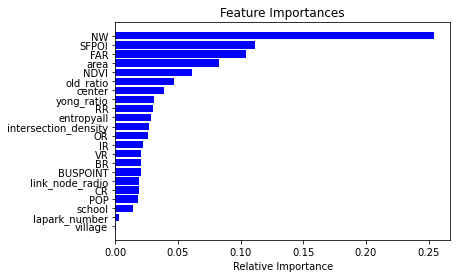

In [70]:
features=df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [68]:
df.columns[[0]]

Index(['area'], dtype='object')